In [46]:
from multiprocessing import Process, Queue, Manager
import multiprocessing
import random
import numpy as np
import psutil
import time

import matplotlib.pyplot as plt

In [12]:

def rand_num(N):
    np.random.rand(N)

num_processes = 64
N = 10000

In [13]:
start_time = time.time()


processes = [Process(target=rand_num, args=((N,))) for _ in range(num_processes)]

for p in processes:
    p.start()

for p in processes:
    p.join()

print(time.time() - start_time)


0.24644708633422852


In [14]:
start_time = time.time()
rand_num(N * 64)
print(time.time() - start_time)

0.0068738460540771484


In [26]:
pool = multiprocessing.Pool(processes=num_processes)

In [27]:
start_time = time.time()

pool_workers = []


for i in range(num_processes):
    p = pool.apply_async(rand_num, (N))
    pool_workers.append(p)

pool_workers = [p.wait() for p in pool_workers]

pool.close()
pool.join()
print(time.time() - start_time)

0.05417013168334961


In [ ]:
start_time = time.time()

with Manager() as manager:
    l = manager.list()
    ret_value = multiprocessing.Queue()

    processes = [Process(target=rand_num, args=(ret_value, l, _, )) for _ in range(num_processes)]
    
    for p in processes:
        p.start()

    for p in processes:
        p.join()

print(time.time() - start_time)


In [64]:
start_time = time.time()
       
with Manager() as manager:

    l = manager.list()
    ret_value = multiprocessing.Queue()
    for _ in range(num_processes):

        rand_num(ret_value, l, _)



    print(time.time() - start_time)


0.6918270587921143


In [23]:
pool_workers = []
print()
print(time.time() - b)
for i in range(num_processes):
    p = pool.apply_async(rand_num, (N))
    pool_workers.append(p)

pool_workers = [p.wait() for p in pool_workers]

pool.close()
pool.join()
print(time.time() - b)


2.0932931900024414


ValueError: Pool not running

In [50]:
import sys
import numpy as np
from multiprocessing import Pool

def integrate(its):
    # I totally cheated and tweaked the number of chunks
    # to get the fastest result
    chunks = 10000
    chunk_size = its / chunks

    np.random.seed()  # Each process needs a different seed!

    sum = 0.0
    for i in range(chunks):  # For each chunk...
        # ...do a vectorised Monte Carlo calculation
        u = np.random.uniform(size=int(its/chunks))
        sum += np.sum(np.exp(-u * u))  # Do the Monte Carlo

    # We did 'its' total iterations in this process, so
    # normalise the result and return it
    return sum / float(its)

times = []
for num_procs in range(1, 16):
    
    start_time = time.time()

    iters = 1000000000
    its = int(iters / num_procs)  # Each process gets a share of the iterations

    pool = Pool(processes=num_procs)

    # Each process calls 'integrate' with 'its' iterations
    args = num_procs * [its]
#     result = pool.map(integrate, args)
    pool_workers = []
    for i in range(num_processes):
        p = pool.apply(integrate, (its,))


    # pool.map returns a list of length 'num_procs', with
    # element 'i' being the return value of 'integrate' from
    # process 'i'

    # Renormalise by the number of processors
#     print(sum(result) / float(num_procs))
    print("hey")

    times.append(time.time() - start_time)

Process ForkPoolWorker-1028:
Traceback (most recent call last):
  File "/Users/daniellengyel/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/daniellengyel/miniconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


KeyboardInterrupt: 

  File "/Users/daniellengyel/miniconda3/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))


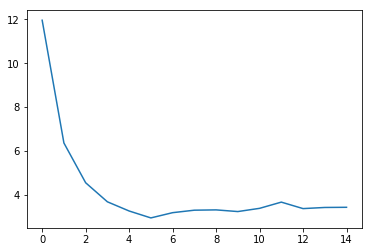

In [47]:
plt.plot(times)

In [ ]:
plt.plot(times)